## `Project - MovieLens Data Analysis`



### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - 0 for non western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use



In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
# Additional

import warnings
warnings.filterwarnings('ignore') # to get rid of warning messages

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Update default background style of plots
sns.set_style(style='darkgrid')

In [4]:
data = pd.read_csv("Data.csv")
item = pd.read_csv("item.csv")
user = pd.read_csv("user.csv")




In [5]:
#Data 
data.describe
data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
#item
item.describe
item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [7]:
#user
user.describe
user.head()


,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [8]:
data.shape

(100000, 4)

In [9]:
user.shape

(943, 5)

In [10]:
item.shape

(1681, 22)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [12]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [13]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [14]:
#missing values 
data.isna().sum()


user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [15]:
user.isna().sum()


user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [16]:
item.isna().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

**Observations:**
timestamp is contains ?? I don't know the meaning of timestamp, the 
item contains movie title, data and genres 
user information contatins age, gender, occupation and zipcode(location)
moive categories are coded with numerical values 

In [17]:
#your code here
df = pd.DataFrame(item,columns=['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir',
                                'Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'])
agg_row = df.sum(axis=0)
print (agg_row)


                


unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64


**Insights:**
Drama, Comedy, Thriller, Action - the greatest numbers 


### Drop the movie where the genre is unknown

In [17]:

df = pd.DataFrame(item)
df.drop(['unknown'],axis=1)


,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Find the movies that have more than one genre 



In [40]:



df_morethanone=df.sum(axis=1)>0

count_row = df_morethanone.count()

print (count_row)




1681


**Insights:** All movies have more than at least one values --> All movies belong to at least one category


### 5. Univariate analysis: #### 

In [20]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


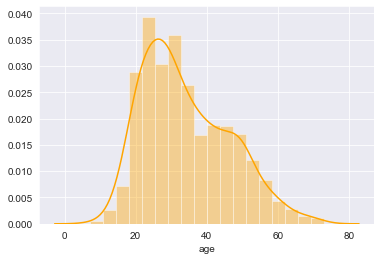

In [21]:
#Age - Comment on the distribution in the visualisation (2 marks)
sns.distplot(user['age'],color='orange')
plt.show()

**Insights:** 
Between age 20-40 is the highest, normal distrubution, right-skewed ;  



In [22]:
item['release year'] = item['release date'].str[-4:].astype('int')

# Alternative way str.split()
# item['release year'] = item['release date'].str.split('-').str[-1].astype('int')

# Alternative way using datetime
# item['release year'] = pd.to_datetime(item['release date']).dt.year



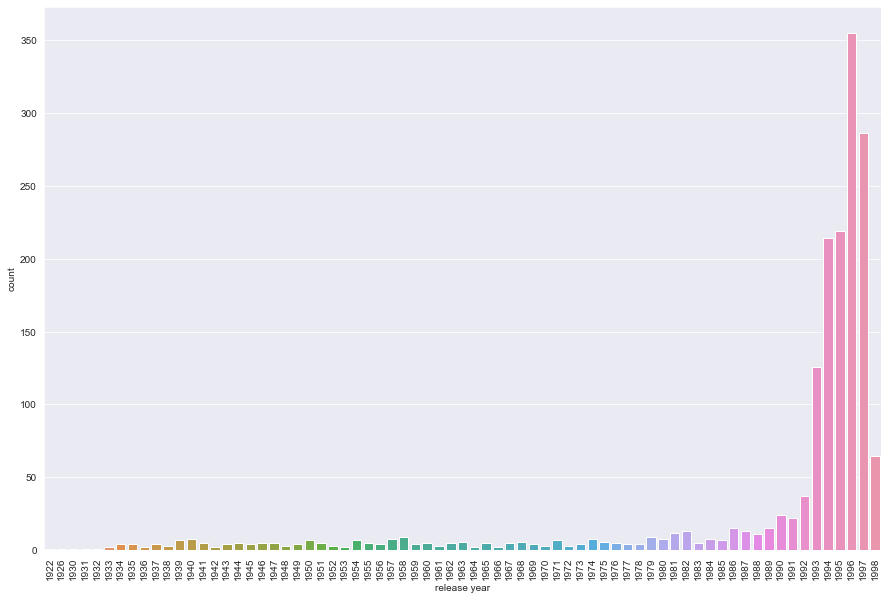

In [23]:
#Release year - Comment on the distribution. What could be the reason for sudden drop in number of movies in 1998? (3 marks)

plt.figure(figsize = (15,10))
plt.xticks(rotation = 90)
sns.countplot(x = item['release year'])
plt.show()
print()


**Insights:**
Release year - Comment on the distribution. What could be the reason for sudden drop in number of movies in 1998? (3 marks)
It is normal distribution and left skew, most of movies are released in '80s and '90s. 
Given that the number of users are consistent by years, it is possible that a small number of movies dominated in 1998. 

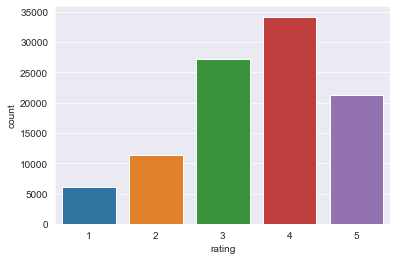

4   34.17
3   27.15
5   21.20
2   11.37
1    6.11
Name: rating, dtype: float64


In [24]:
#the output is provided as a hint
sns.countplot(x = data['rating'])
plt.show()
ratings = data['rating'].value_counts(normalize=True)
print(ratings*100)



**Insights:**
Rating - What is the distribution of the ratings? (1 marks)
Normal distribution. left skewed. Mode is larger than mean. 

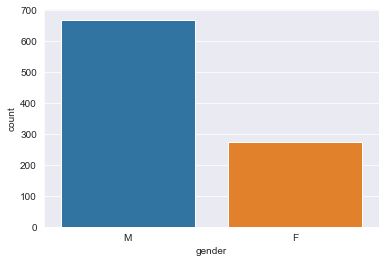

M   71.05
F   28.95
Name: gender, dtype: float64


In [25]:
sns.countplot(user['gender'])
plt.show()

gender_dist = user['gender'].value_counts(normalize = True)
print(gender_dist*100)


**Insights:**
Gender - Rating distribution among genders (1 marks)
most of users are men. 

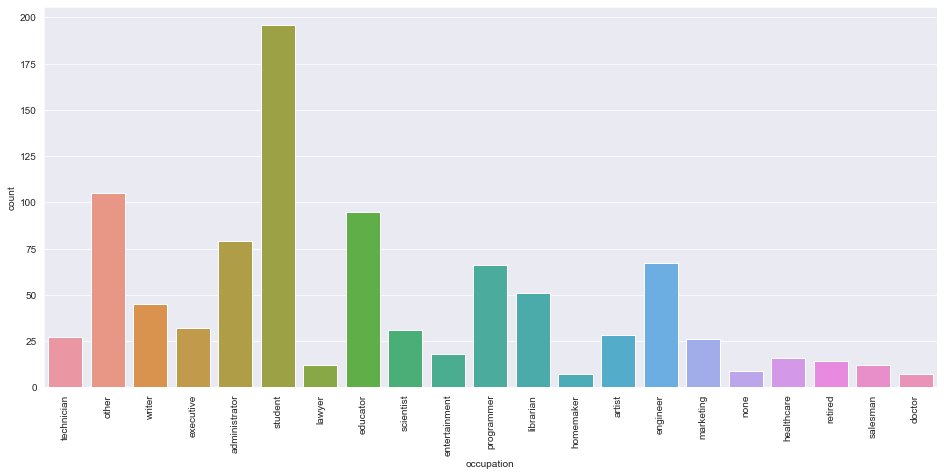

student         20.78
other           11.13
educator        10.07
administrator    8.38
engineer         7.10
programmer       7.00
librarian        5.41
writer           4.77
executive        3.39
scientist        3.29
artist           2.97
technician       2.86
marketing        2.76
entertainment    1.91
healthcare       1.70
retired          1.48
salesman         1.27
lawyer           1.27
none             0.95
doctor           0.74
homemaker        0.74
Name: occupation, dtype: float64


In [26]:
plt.figure(figsize=(16,7))                             # to enlarge figure size
plt.xticks(rotation = 90)
sns.countplot(user['occupation'])
plt.show()

occupation = user['occupation'].value_counts(normalize=True)
print(occupation*100)

**Insights:**
Occupation - Which occupations have rated for the most of the movies, what does this suggest ? Also, can you comment on the process of data collection? (3 marks)
- Students rated for the most of the movies. Given that the age distribution also suggests that the young generation participate it more, students have more willingness to review movies. To avoid bias, it is better to promote better enagement with other occupations.  

### Visualize how popularity of genres has changed over the years 



In [51]:
# The table with the release year and genres

item['release year'] = item['release date'].str[-4:].astype('int')
df1 = pd.DataFrame(df, index=['release year'], columns=['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir',
                                'Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'])
                                   

df1.sum()


unknown       0.00
Action        0.00
Adventure     0.00
Animation     0.00
Childrens     0.00
Comedy        0.00
Crime         0.00
Documentary   0.00
Drama         0.00
Fantasy       0.00
Film-Noir     0.00
Horror        0.00
Musical       0.00
Mystery       0.00
Romance       0.00
Sci-Fi        0.00
Thriller      0.00
War           0.00
Western       0.00
dtype: float64

**Insights:**


### 7. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times 

In [53]:
# Group by data according to movie id and use metric count and mean to get count of ratings and average ratings for every movie.
#  the output is provided
movie = data.groupby('movie id')['rating'].agg(['count','mean'])

movie.head()

,count,mean
movie id,,
1,452,3.88
2,131,3.21
3,90,3.03
4,209,3.55
5,86,3.30


In [54]:
# Slicing movies have count of ratings more than 100 and storing it in the original 'movie' dataframe. 

movie = movie[movie['count'] > 100]

movie.head()


,count,mean
movie id,,
1,452,3.88
2,131,3.21
4,209,3.55
7,392,3.80
8,219,4.00
9,299,3.90
11,236,3.85
12,267,4.39
13,184,3.42


In [50]:
# Sorting the dataframe according to the average movie ratings

movie = movie.sort_values(by=['mean'],ascending=True)
movie.head()


,count,mean
movie id,,
122,106,2.34
243,132,2.44
325,128,2.55
260,127,2.57
358,143,2.62


In [52]:
# Merging with 'item' dataset to get movie titles
# Selecting top 25 movies only
movie.merge(item[['movie id', 'movie title']],on='movie id',how='left').head(25)



,movie id,count,mean,movie title
0,122,106,2.34,"Cable Guy, The"
1,243,132,2.44,Jungle2Jungle
2,325,128,2.55,Crash
3,260,127,2.57,Event Horizon
4,358,143,2.62,Spawn
5,29,114,2.67,Batman Forever
6,231,142,2.68,Batman Returns
7,259,162,2.69,George of the Jungle
8,926,101,2.70,Down Periscope
9,264,101,2.74,Mimic


### 8. Check for the validity of the below statements with respect to the data provided 



In [112]:


df=pd.merge(pd.merge(data, user, on='user id'),item,on='movie id') # when you merge 3 datasets


#drama 
male_drama=df.loc[df['gender'] == 'M', 'Drama'].sum()
female_drama=df.loc[df['gender'] == 'F', 'Drama'].sum()
drama_count=df['Drama'].sum()               
print(female_drama/drama_count*100)
print(male_drama/drama_count*100)  



#sci-fi 
male_sci=df.loc[df['gender'] == 'M', 'Sci-Fi'].sum()
female_sci=df.loc[df['gender'] == 'F', 'Sci-Fi'].sum()
sci_count=df['Sci-Fi'].sum()
print(female_sci/sci_count*100)
print(male_sci/sci_count*100)

#
male_romance=df.loc[df['gender'] == 'M', 'Romance'].sum()
female_romance=df.loc[df['gender'] == 'F', 'Romance'].sum()
romance_count=df['Romance'].sum()
print(female_romance/romance_count*100)
print(male_romance/romance_count*100)

27.592430129088857
72.40756987091113
20.652003142183815
79.34799685781618
30.10122809722008
69.89877190277993


**Conclusion:**
27% female/72% male --> Drama is more popular among men than women = the assumption is true
20% female/79% male --> Sci-fi is more popular among men than women = the assumption is false
30% female/89% male --> Romance is more popular among men than women = the assumption is true 




### 9. Create a user-item matrix in form of a dataframe using the movie name, user id and the rating given by the user to the movie. (10 marks)

- Hint:
Create a pivot table (read <a href = "https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.pivot_table.html">here</a>) and reach to a dataframe that has index as the movie names and the columns are the user ids. Each entry in the data frame corresponds to the rating a movie has received from a user.

Note that such a matrix is used in recommendation systems and we will talk about them later in the journey. We can use this to train an algorithm that can provide recommendations of movies for users.

In [129]:

#a dataframe that has index as the movie names and the columns are the user ids

table = pd.pivot_table(df, values='rating', index=['movie title'],
                    columns=['user id'], aggfunc=np.sum)

table


user id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1-900,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
101 Dalmatians,2.00,nan,nan,nan,2.00,nan,nan,nan,nan,nan,...,2.00,nan,nan,2.00,4.00,nan,nan,nan,nan,nan
12 Angry Men,5.00,nan,nan,nan,nan,4.00,4.00,nan,nan,5.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
187,nan,nan,2.00,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns,3.00,nan,nan,nan,nan,nan,3.00,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,4.00
Young Guns II,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,3.00
"Young Poisoner's Handbook, The",nan,nan,nan,nan,nan,nan,3.00,nan,nan,nan,...,nan,nan,5.00,nan,nan,nan,nan,nan,nan,nan
